<a href="https://colab.research.google.com/github/DylanCTY/Trial-space/blob/main/Lecture2(0430).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Text Processing

In [ ]:
import pandas as pd
import re
import nltk

In [ ]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer, SnowballStemmer

# Download extra packages

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Read the file

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/RDGopal/IB9CW0-Text-Analytics/main/Data/sms_spam.csv')

In [ ]:
df

# Accessing files from Github

In [ ]:
import requests

def list_github_directory(user, repo, path):
    url = f"https://api.github.com/repos/{user}/{repo}/contents/{path}"
    response = requests.get(url)
    if response.status_code == 200:
        content = response.json()
        return [file['name'] for file in content if file['type'] == 'file']
    else:
        print("Failed to retrieve data:", response.status_code)
        return []

# Usage
user = 'RDGopal'
repo = 'IB9CW0-Text-Analytics'
path = 'Data'
files = list_github_directory(user, repo, path)
print("Files in the Data folder:", files)


# Data Preprocessing

In [ ]:
# Lowercase
df['text'] = df['text'].str.lower()

In [ ]:
# Tokenize
df['tokens'] = df['text'].apply(nltk.word_tokenize)

In [ ]:
# get stopwords
stop_words = stopwords.words('english')
extra_words = ['.','*',',']
stop_words.extend(extra_words)

In [ ]:
# Remove stopwords
df['tokens'] = df['tokens'].apply(lambda tokens: [token for token in tokens if token not in stop_words and token.isalpha()])

In [ ]:
# Create a PorterStemmer object
stemmer = PorterStemmer()
df['tokens'] = df['tokens'].apply(lambda tokens: [stemmer.stem(token) for token in tokens])

In [ ]:
# Lemmatize
lemmatizer = WordNetLemmatizer()
df['tokens'] = df['tokens'].apply(lambda tokens: [lemmatizer.lemmatize(token) for token in tokens])

In [ ]:
# Combine tokens back into a cleaned review
df['text1'] = df['tokens'].apply(lambda tokens: ' '.join(tokens))

In [ ]:
df[['text','text1']]

In [ ]:
# Put it all into a function
def preprocess_text(text):
    # Lowercase
    text = text.lower()
    # Tokenize
    tokens = nltk.word_tokenize(text)
    # Remove stopwords
    stop_words = stopwords.words('english')
    extra_words = ['.','*',',']
    stop_words.extend(extra_words)
    tokens = [token for token in tokens if token not in stop_words and token.isalpha()]
    # Lemmatize
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(tokens)

In [ ]:

df['text'] = df['text'].apply(preprocess_text)

#  Your Turn
Read and preprocess the file `oct_delta.csv`

Pracctice 1

In [17]:
df2 = pd.read_csv('oct_delta.csv')

In [31]:
df2

,weekday,month,date,year,text,tokens
0,Thu,Oct,1,2015,i know that can be frustrating..we hope to ha...,"[know, frustrating, hope, parked, deplaned, sh..."
1,Thu,Oct,1,2015,terribly sorry for the inconvenience. if we c...,"[terribly, sorry, inconvenience, assistance, t..."
2,Thu,Oct,1,2015,"i can check, pls follow and dm your confirma...","[check, pls, follow, dm, confirmation, review,..."
3,Thu,Oct,1,2015,"...alerts, pls check here: http://t.co/0jlczn...","[alert, pls, check, http, jh]"
4,Thu,Oct,1,2015,...advisory has only been issued for the baha...,"[advisory, issued, bahamas, could, change, che..."
...,...,...,...,...,...,...
1372,Thu,Oct,15,2015,woohoo! way to go marla and mira! happy trave...,"[woohoo, way, go, marla, mira, happy, travel, dd]"
1373,Thu,Oct,15,2015,you're welcome! have a great day! *rd,"[welcome, great, day, rd]"
1374,Thu,Oct,15,2015,"if you do not make your connection, the gate...","[make, connection, gate, agent, advise, option..."
1375,Thu,Oct,15,2015,...719pm. *dd 2/2,[dd]


In [25]:
# Remove usernames
df2['text'] = df2['text'].apply(lambda x: re.sub(r'@\w+', '', x))

In [26]:
# Lowercase
df2['text'] = df2['text'].str.lower()

In [27]:
# Tokenize
df2['tokens'] = df2['text'].apply(nltk.word_tokenize)

In [28]:
# get stopwords
stop_words = stopwords.words('english')
extra_words = ['.','*',',']
stop_words.extend(extra_words)

In [29]:
# Remove stopwords
df2['tokens'] = df2['tokens'].apply(lambda tokens: [token for token in tokens if token not in stop_words and token.isalpha()])

In [30]:
# Lemmatize
lemmatizer = WordNetLemmatizer()
df2['tokens'] = df2['tokens'].apply(lambda tokens: [lemmatizer.lemmatize(token) for token in tokens])

# Bag-of-Words and tf-idf

In [32]:
import gensim
from gensim.corpora import Dictionary
from gensim.models import LdaModel,CoherenceModel,TfidfModel,Nmf,LsiModel

In [33]:
# create list of tokens
documents = df['tokens'].tolist()

In [ ]:
documents

In [35]:
# create the dictionary
dictionary = Dictionary(documents) # list of lists (documents)

In [36]:
# Optional if want to see the dictionary
dictionary.save_as_text('testxyz.csv',sort_by_word=True)

In [37]:
# filter extremes from the dictionary (optional, but recommended)
dictionary.filter_extremes(no_below=5, no_above=0.5) # at least appears in 5 documents, no more than 50%

In [38]:
# create bag-of-words representation
corpus = [dictionary.doc2bow(document) for document in documents]

In [ ]:
corpus

In [40]:
# create tf-idf representation
tfidf_model = TfidfModel(corpus)
tfidf_corpus = [tfidf_model[doc] for doc in corpus]

In [ ]:
tfidf_corpus

# Frequency Analysis

In [43]:
!pip install matplotlib wordcloud


To perform frequency analysis, we need to count how often each word appears in your corpus. We can utilize the dictionary and the Bag-of-Words (BoW) corpus

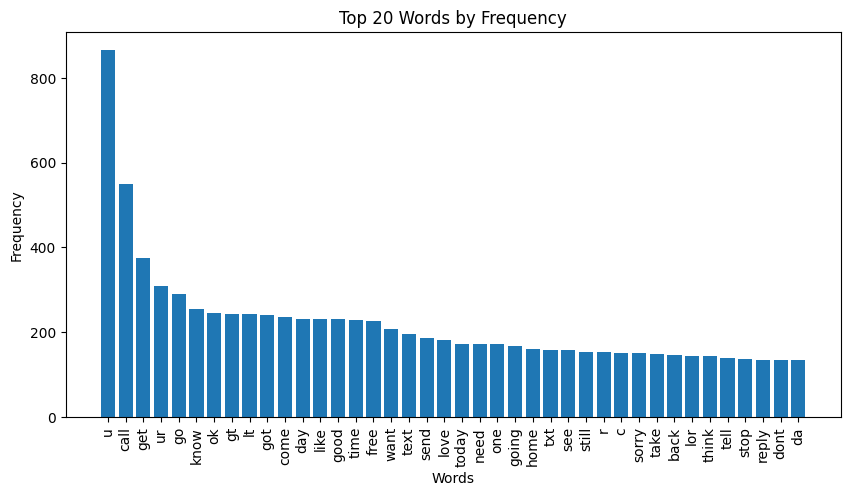

In [45]:
from collections import Counter
import matplotlib.pyplot as plt

# Summing up the counts from the BoW corpus
total_word_count = Counter(word_id for document in corpus for word_id, count in document)

# Mapping back the word IDs to words
mapped_word_counts = [(dictionary[word_id], count) for word_id, count in total_word_count.items()]

# Sort words by frequency
sorted_word_counts = sorted(mapped_word_counts, key=lambda w: w[1], reverse=True)

# Let's plot the top words
plt.figure(figsize=(10, 5))
words, counts = zip(*sorted_word_counts[:40])
plt.bar(words, counts)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 20 Words by Frequency')
plt.xticks(rotation=90)
plt.show()


# Creating a Word Cloud
To create a word cloud, you will need the frequencies in a dictionary format, where the keys are words and the values are their frequencies.

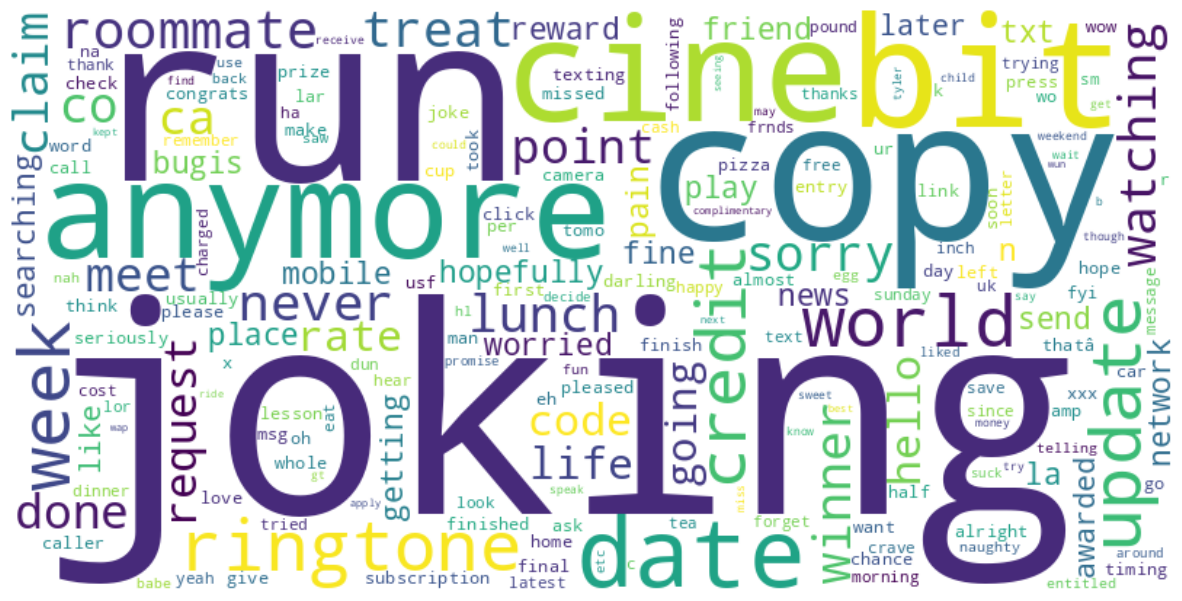

In [56]:
from wordcloud import WordCloud

# Creating a dictionary for word cloud
word_freq_dict = dict(sorted_word_counts)

# Creating word cloud
wordcloud = WordCloud(width = 800, height = 400, background_color ='white').generate_from_frequencies(word_freq_dict)

# Displaying the word cloud
plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()


# Your Turn
Conduct frequency analysis with `oct_delta.csv` file.

## **Practice 2**

In [46]:
# create list of tokens
documents2 = df2['tokens'].tolist()

In [ ]:
documents2

In [48]:
# create the dictionary
dictionary2 = Dictionary(documents2) # list of lists (documents)

In [49]:
# filter extremes from the dictionary (optional, but recommended)
dictionary2.filter_extremes(no_below=5, no_above=0.5) # at least appears in 5 documents, no more than 50%

In [50]:
# create bag-of-words representation
corpus2 = [dictionary2.doc2bow(document) for document in documents]

In [ ]:
corpus2

In [52]:
# create tf-idf representation
tfidf_model2 = TfidfModel(corpus2)
tfidf_corpus2 = [tfidf_model2[doc] for doc in corpus]

In [ ]:
tfidf_corpus2

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt

# Summing up the counts from the BoW corpus
total_word_count = Counter(word_id for document in corpus2 for word_id, count in document)

# Mapping back the word IDs to words
mapped_word_counts = [(dictionary[word_id], count) for word_id, count in total_word_count.items()]

# Sort words by frequency
sorted_word_counts = sorted(mapped_word_counts, key=lambda w: w[1], reverse=True)

# Let's plot the top words
plt.figure(figsize=(10, 5))
words, counts = zip(*sorted_word_counts[:40])
plt.bar(words, counts)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 20 Words by Frequency')
plt.xticks(rotation=90)
plt.show()

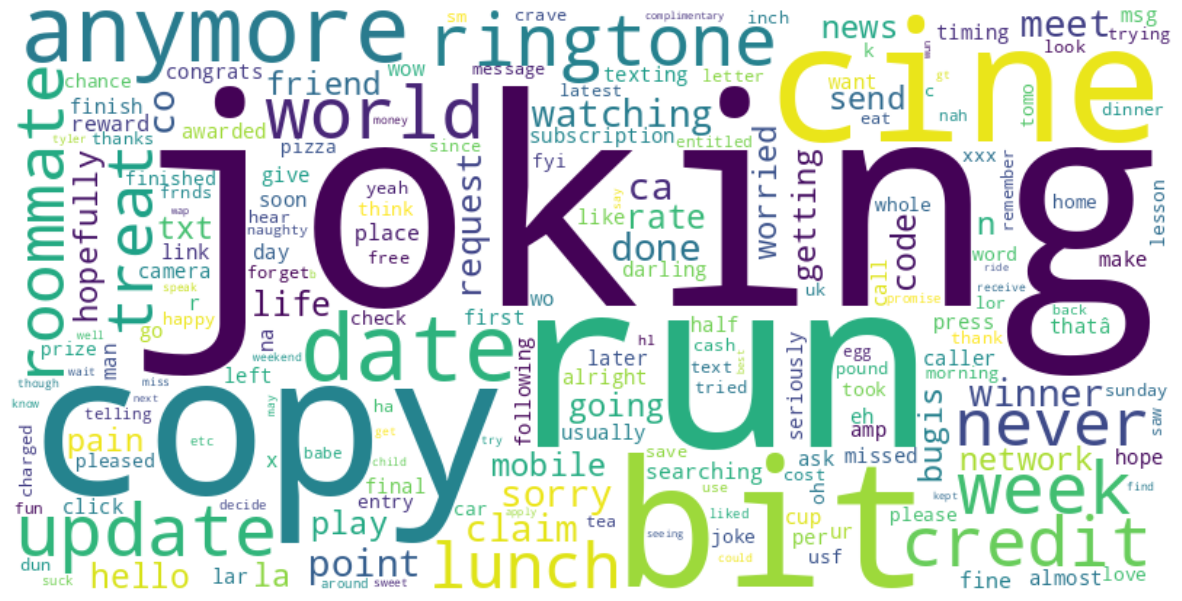

In [57]:
from wordcloud import WordCloud

# Creating a dictionary for word cloud
word_freq_dict = dict(sorted_word_counts)

# Creating word cloud
wordcloud = WordCloud(width = 800, height = 400, background_color ='white').generate_from_frequencies(word_freq_dict)

# Displaying the word cloud
plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()


# Tiny Shakespeare novel

### Read the file locally

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Load the text file
with open('/content/tinyshakespeare.txt', 'r') as file:
    text = file.read().lower()

# Tokenize the text
tokens = word_tokenize(text)


### Or Read the file from GitHub

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

import requests

# URL to the raw text file on GitHub
url = 'https://raw.githubusercontent.com/RDGopal/IB9CW0-Text-Analytics/main/Data/tinyshakespeare.txt'

# Use requests to get the content of the file
response = requests.get(url)

# Ensure the request was successful
if response.status_code == 200:
    text = response.text.lower()
    # Continue processing the text as needed
else:
    print("Failed to retrieve the file. Status code:", response.status_code)

# Tokenize the text
tokens = word_tokenize(text)

In [ ]:
len(tokens)

## Zipf's Law

Zipf's Law is an empirical law that suggests the frequency of a word in a natural language text is inversely proportional to its rank in the frequency table. To test Zipf's Law with your tokenized text data, we follow the steps below:

1. **Calculate Word Frequencies**: Count how often each word appears in your tokenized text.

2. **Sort Words by Frequency**: Rank the words by their frequency in descending order.

3. **Plot the Frequencies**: Plot the frequency of each word against its rank on a log-log plot.

4. **Analyze the Plot**: Zipf's Law predicts a linear relationship on a log-log plot with a slope of approximately -1.


In [ ]:
import nltk
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np

# Count frequencies
word_counts = Counter(tokens)

# Sort words by frequency
sorted_word_counts = word_counts.most_common()

# Prepare data for plotting
ranks = range(1, len(sorted_word_counts) + 1)
frequencies = [freq for _, freq in sorted_word_counts]

# Log-log plot
plt.figure(figsize=(8, 6))
plt.loglog(ranks, frequencies, marker="o")
plt.title('Zipf\'s Law')
plt.xlabel('Rank of the word')
plt.ylabel('Frequency of the word')
plt.grid(True)
plt.show()


In [ ]:
# Get English stopwords
stop_words = set(stopwords.words('english'))

# Remove stopwords from tokens
filtered_tokens = [token for token in tokens if token not in stop_words and token.isalpha()]


In [ ]:
len(filtered_tokens)

In [ ]:
from collections import Counter

# Count word frequencies
word_counts = Counter(filtered_tokens)


In [ ]:
word_counts

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a word cloud
wordcloud = WordCloud(width = 800, height = 400, background_color ='white').generate_from_frequencies(word_counts)

# Display the word cloud
plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Get the 20 most common words
most_common_words = word_counts.most_common(20)

# Unpack the words and their frequencies
words, frequencies = zip(*most_common_words)

# Create a bar chart
plt.figure(figsize=(10, 8))
plt.bar(words, frequencies)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 20 Most Frequent Words')
plt.xticks(rotation=45)  # Rotate the words on x-axis to avoid overlapping
plt.show()


# Your Turn
Run the following code to get a novel from HugginFace and conduct Zipf's law analysis.

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

import requests

# URL to the raw text file on GitHub
url ="https://datasets-server.huggingface.co/rows?dataset=JiggaBooJombs%2FNovelist&config=default&split=train&offset=0&length=100"

# Use requests to get the content of the file
response = requests.get(url)

# Ensure the request was successful
if response.status_code == 200:
    text = response.text.lower()
    # Continue processing the text as needed
else:
    print("Failed to retrieve the file. Status code:", response.status_code)

# Tokenize the text
tokens = word_tokenize(text)

# POS Tagging

In [ ]:
# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

In [ ]:


# POS tagging the filtered tokens
pos_tags = nltk.pos_tag(filtered_tokens)

# Count word frequencies (including the POS tags for uniqueness)
word_counts = Counter(pos_tags)

# Create a list of dictionaries to later convert to a DataFrame
data = [{'Word': word, 'POS': pos, 'WordCount': count} for (word, pos), count in word_counts.items()]

# Create the DataFrame
df_pos = pd.DataFrame(data)

# Display the first few rows of the DataFrame to verify
print(df_pos.head())

## Create POS mapping

In [ ]:
pos_tag_full_form = {
    'CC': 'Coordinating conjunction',
    'CD': 'Cardinal number',
    'DT': 'Determiner',
    'EX': 'Existential there',
    'FW': 'Foreign word',
    'IN': 'Preposition or subordinating conjunction',
    'JJ': 'Adjective',
    'JJR': 'Adjective, comparative',
    'JJS': 'Adjective, superlative',
    'LS': 'List item marker',
    'MD': 'Modal',
    'NN': 'Noun, singular or mass',
    'NNS': 'Noun, plural',
    'NNP': 'Proper noun, singular',
    'NNPS': 'Proper noun, plural',
    'PDT': 'Predeterminer',
    'POS': 'Possessive ending',
    'PRP': 'Personal pronoun',
    'PRP$': 'Possessive pronoun',
    'RB': 'Adverb',
    'RBR': 'Adverb, comparative',
    'RBS': 'Adverb, superlative',
    'RP': 'Particle',
    'SYM': 'Symbol',
    'TO': 'to',
    'UH': 'Interjection',
    'VB': 'Verb, base form',
    'VBD': 'Verb, past tense',
    'VBG': 'Verb, gerund or present participle',
    'VBN': 'Verb, past participle',
    'VBP': 'Verb, non-3rd person singular present',
    'VBZ': 'Verb, 3rd person singular present',
    'WDT': 'Wh-determiner',
    'WP': 'Wh-pronoun',
    'WP$': 'Possessive wh-pronoun',
    'WRB': 'Wh-adverb'
}


In [ ]:
df_pos['POS Full Form'] = df_pos['POS'].map(pos_tag_full_form)

# Display the DataFrame with the new column
print(df_pos.head())

In [ ]:
# Count total occurrences of words for each POS tag
pos_total_counts = df_pos.groupby('POS').size()

# Display the total occurrences of words for each POS tag
print(pos_total_counts)

# Your Turn
Conduct POS analysis for `sms_spam.csv` and `oct_delta.csv` data.